In [18]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt



In [5]:
if __name__=="__main__":
    dataset = pd.read_csv("./data/heart.csv")

dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
X = dataset.drop(['target'],axis=1)

y= dataset['target']

In [10]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.35,random_state=42)

KNN
Accuracy 0.6908077994428969
RandomForest
Accuracy 0.9832869080779945
BaggingClassifier
Accuracy 0.7270194986072424
GradientBoosting
Accuracy 0.935933147632312


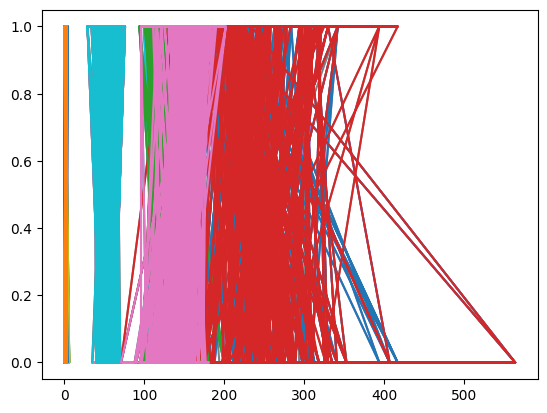

In [24]:
estimadores={
    'KNN' : KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=50),
    'GradientBoosting' : GradientBoostingClassifier(n_estimators=50)
    }


    
for name, estimador in estimadores.items():
    estimador.fit(X_train,y_train)
    predictions = estimador.predict(X_test)

    print("="*32)
    print(name)
    accuracy=accuracy_score(y_test,predictions)
    print("Accuracy",accuracy)


    plt.plot(X_test, predictions)
    #plt.plot(X_test,accuracy)
    #plt.xlabel('Estimators')
    #plt.ylabel('Accuracy')
    #plt.show()
    #plt.savefig('Boost.png')